In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import hashlib
import os
import re
from matplotlib.patches import Patch

In [5]:
gis_folder_path = os.getcwd()
gis_folder_path += '/data/parlimentary-constituencies'
gdf = gpd.read_file(gis_folder_path)
csv_file_path = 'data/myNetaWebScraped.csv'
df_candidates = pd.read_csv(csv_file_path)

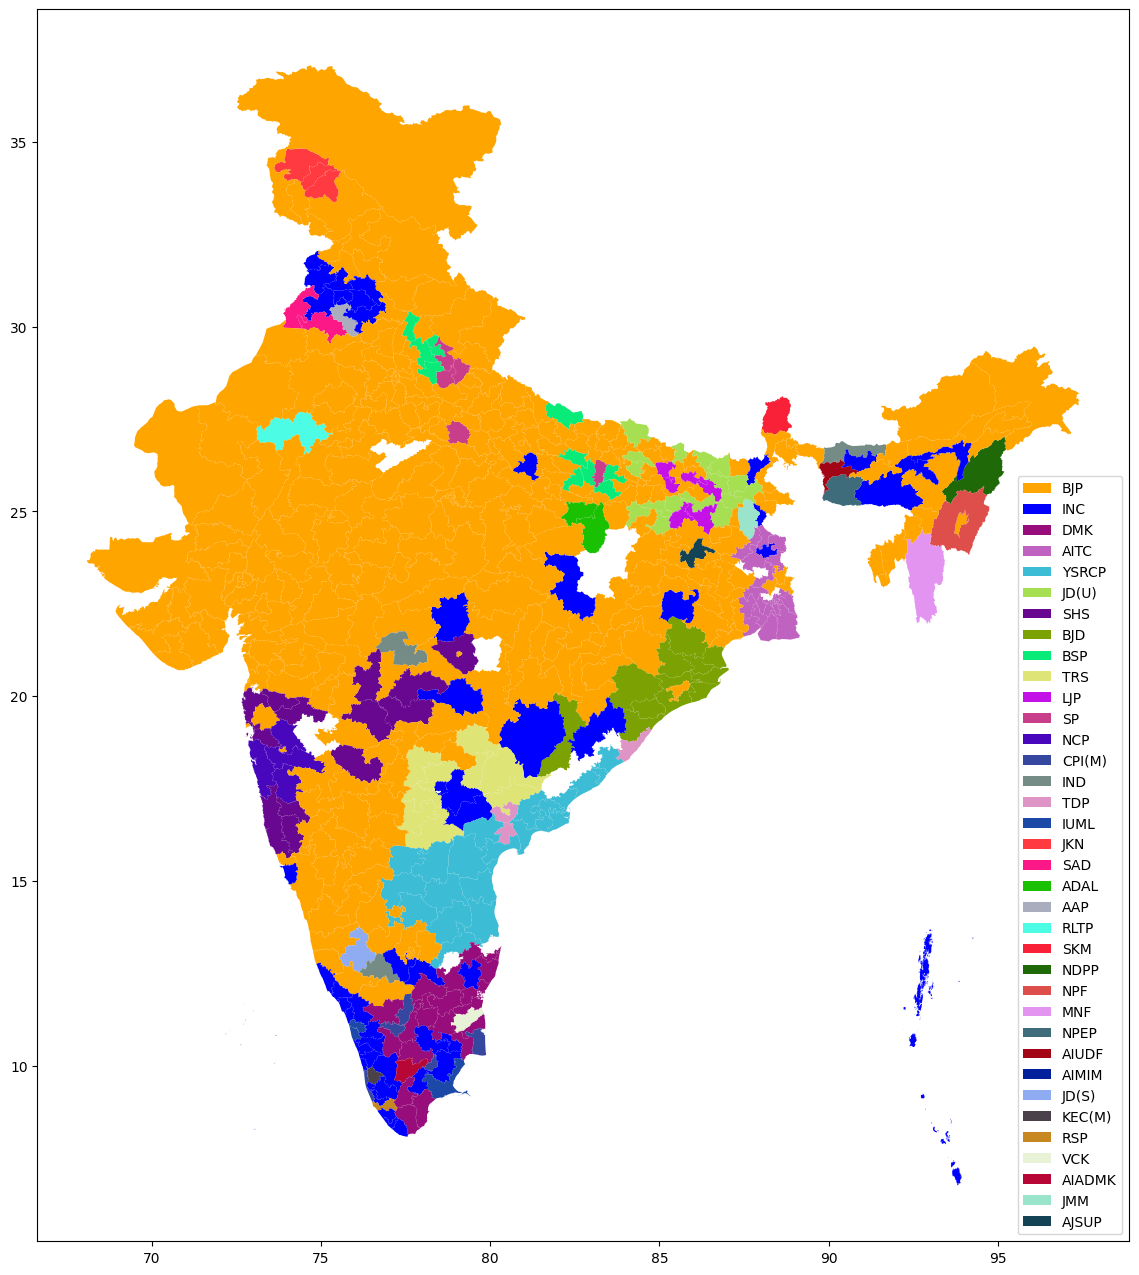

In [6]:
def get_color(party):
    if party == 'BJP':
        return 'orange'
    elif party == 'INC':
        return 'blue'
    hash_value = int(hashlib.sha256(party.encode('utf-8')).hexdigest(), 16) # hash based color assignment
    color = '#' + format(hash_value % (2**24), '06x')
    return color

plt.figure(figsize=(15, 16))
artists = []
labels = []
party_counts = {}

for index, row in gdf.iterrows():
    # PC_NAMES include reservations as well, so to remove that
    pc_name_main = re.sub(r'\s*\(.*\)', '', row['PC_NAME']).lower()

    # Find the corresponding constituency in the DataFrame based on the main PC_NAME
    constituency = df_candidates[df_candidates['CONSTITUENCY'].str.lower().str.startswith(pc_name_main)]

    if not constituency.empty:
        party = constituency.iloc[0]['PARTY']
        color = get_color(party)
        gdf.iloc[[index]].plot(color=color, ax=plt.gca())
        
        # Unique legend
        if party not in party_counts:
            party_counts[party] = 1
            artists.append(Patch(facecolor=color, label=party))
            labels.append(party)
        else:
            party_counts[party] += 1


sorted_indices = sorted(range(len(party_counts.values())), key=lambda k: list(party_counts.values())[k], reverse=True)
artists = [artists[i] for i in sorted_indices]
labels = [labels[i] for i in sorted_indices]

plt.legend(handles=artists, labels=labels, loc='lower right')

plt.show()